### Step 1: Reading and Understanding the Data

In [177]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sqlite3
conn = sqlite3.connect('research.db')


###  Fetch all accounts

In [178]:
cur = conn.cursor()
cur.execute("select \"Id\", \"RecordType.Name\",\"Industry\",\"Business_Type__c\",\"Country__c\",\"Is_External__c\",\"ParentId\"from \"Account\" union \
select \"Id\", \"RecordType.Name\",\"Education\" as \"Industry\",\"Not for profit\" as \"Business_Type__c\",\"Australia\" as \"Country__c\", \
\"Is_External__c\",\"ParentId\" from \"Account_internal\"")
accounts_all = cur.fetchall()
accounts_all= pd.DataFrame(accounts_all)
accounts_all.columns= ['AccountID', 'AccountType','Industry','BusinessType','Country','Internal_External','ParentAccount']
accounts_all.loc[accounts_all['AccountType'] == 'University Department', 'Industry'] = 'Education'  
accounts_all.loc[accounts_all['AccountType'] == 'University Department', 'BusinessType'] = 'University'  
accounts_all.loc[accounts_all['AccountType'] == 'University Department', 'Country'] = 'Australia' 
accounts_all['f_Australia']=accounts_all['Country'].apply(lambda x: 1 if x == 'Australia' else 0)
accounts_all["f_parent"]=accounts_all['ParentAccount'].notnull().astype(int)
accounts_all=accounts_all.drop(["ParentAccount"],axis=1)
accounts_all=accounts_all.drop(["Country"],axis=1)

In [179]:
cur.execute("select * from \"Opportunities\"")
Opportunity_raw = cur.fetchall()
Opportunity_raw= pd.DataFrame(Opportunity_raw)
Opportunity_raw.columns= ['ID', 'outcome','status_reason','init_OppType','Opptype','Supppoted', 
                          'createDate','est_closeDate','act_closeDate', 'est_amt','est_proj','act_amt',
                          'act_proj','bd_cluster','bd_div','aud_type','course_type','accountId',
                          'cust_contact','lead_aca_contact','lead_faculty','lead_school','lead_dep','supp_1'
                          ,'supp_2','ownerid','parent_opp'
                         ]
Opportunity_raw.loc[Opportunity_raw["status_reason"]=="Other (Lost)","outcome"] = "Closed Lost"

Opportunity_raw.loc[Opportunity_raw["lead_faculty"].isnull(),"lead_faculty"] = Opportunity_raw["supp_1"]
Opportunity_raw.loc[Opportunity_raw["lead_school"]=="0012e000002Z3pPAAS","lead_faculty"] = "0012e000002ZLg7AAG"
Opportunity_raw.loc[Opportunity_raw["lead_school"]=="0012e000002YlvyAAC","lead_faculty"] = "0012e000002ZNYOAA4"

Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002cDpsAAE","lead_faculty"] = "0012e000002ZGfbAAG"
Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002cFb5AAE","lead_faculty"] = "0012e000002ZNYOAA4"
Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002cFEoAAM","lead_faculty"] = "0012e000002Zt1zAAC"
Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002cFK4AAM","lead_faculty"] = "0012e000002Zt1RAAS"
Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002cGXKAA2","lead_faculty"] = "0012e000002ZGfbAAG"
Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002cLc4AAE","lead_faculty"] = "0012e000002ZGfbAAG"
Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002cLTSAA2","lead_faculty"] = "0012e000002ZmnxAAC"
Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002cMYMAA2","lead_faculty"] = "0012e000002ZLg7AAG"
Opportunity_raw.loc[Opportunity_raw["lead_aca_contact"]=="0032e000002emOlAAI","lead_faculty"] = "0012e000002ZNYOAA4"

Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-HASS") & (Opportunity_raw["bd_div"]=="MGSE") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002Zmo0AAC"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-HASS") & (Opportunity_raw["bd_div"]=="FFAM") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZmOZAA0"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-HASS") & (Opportunity_raw["bd_div"]=="FBE") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLgJAAW"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-HASS") & (Opportunity_raw["bd_div"]=="ARTS") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZNYOAA4"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-MDHS") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZGfbAAG"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-MSPACE") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002Zt1RAAS"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-HASS") & (Opportunity_raw["bd_div"]=="FBE") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLgJAAW"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-STEM") & (Opportunity_raw["bd_div"]=="ABP") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLgIAAW"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-STEM") & (Opportunity_raw["bd_div"]=="FVAS") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZmnzAAC"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-STEM") & (Opportunity_raw["bd_div"]=="MSE") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
Opportunity_raw.loc[(Opportunity_raw["bd_cluster"]=="RIC-BDI-STEM") & (Opportunity_raw["bd_div"]=="SCIENCE") & (Opportunity_raw["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZmnxAAC"


#Opportunity_raw.loc[Opportunity_raw["lead_faculty"].isnull(),"lead_faculty"] = "Missing Faculty"
Opportunity_raw.loc[Opportunity_raw["act_amt"].isnull(),"act_amt"] = Opportunity_raw["est_amt"] 
Opportunity_raw.loc[Opportunity_raw["act_amt"].isnull(),"act_amt"] = 0
Opportunity_raw.loc[Opportunity_raw["act_proj"].isnull(),"act_proj"] = Opportunity_raw["est_proj"]
Opportunity_raw.loc[Opportunity_raw["act_proj"].isnull(),"act_proj"] = 0
Opportunity_raw.loc[Opportunity_raw["act_closeDate"].isnull(),"act_closeDate"] = Opportunity_raw["est_closeDate"]
Opportunity_raw['createDate'] = Opportunity_raw['createDate'].str[:10]
Opportunity_raw['createDate'] = pd.to_datetime(Opportunity_raw['createDate'])
Opportunity_raw['act_closeDate'] = pd.to_datetime(Opportunity_raw['act_closeDate'])
Opportunity_raw['closeDate_month'] = Opportunity_raw['act_closeDate'].dt.month
Opportunity_raw['createDate_month'] = Opportunity_raw['createDate'].dt.month
Opportunity_raw['closeDate_year'] = Opportunity_raw['act_closeDate'].dt.year
Opportunity_raw['createDate_year'] = Opportunity_raw['createDate'].dt.year
Opportunity_raw['days_diff']=(Opportunity_raw['act_closeDate']-Opportunity_raw['createDate']).dt.days
Opportunity_raw["f_parent_opp"]=Opportunity_raw['parent_opp'].notnull().astype(int)

Opportunity_raw['RN'] = Opportunity_raw.sort_values(['createDate','act_closeDate'], ascending=[True,True]).groupby(['accountId']).cumcount() + 1
Opportunity_raw.loc[Opportunity_raw["accountId"].isnull(),"RN"] = 0
Opportunity_raw_after=Opportunity_raw[['outcome','Opptype','Supppoted', 
                          'days_diff','createDate','act_closeDate','closeDate_month','createDate_month','closeDate_year','createDate_year','act_amt',
                          'act_proj','accountId',
                          'lead_faculty','f_parent_opp','RN']]


In [180]:
Opportunity_raw_won=Opportunity_raw_after[Opportunity_raw_after.outcome=='Closed Won']
Opportunity_raw_won['RN_2'] = Opportunity_raw_won.sort_values(['createDate','act_closeDate'], ascending=[True,True]).groupby(['accountId']).cumcount() + 1
Opportunity_raw_won=Opportunity_raw_won[Opportunity_raw_won.RN==1]
Opportunity_raw_won=Opportunity_raw_won[['accountId','createDate']]
Opportunity_raw_won.columns=['accountID_match','firstwon_createdate']
Opportunity_raw_after=Opportunity_raw_after.merge(Opportunity_raw_won, left_on='accountId', right_on='accountID_match',how='left')
Opportunity_raw_after['f_won_before']=np.where((Opportunity_raw_after['createDate'] >= Opportunity_raw_after['firstwon_createdate']), 1, 0)
Opportunity_raw_after.loc[Opportunity_raw_after["accountId"].isnull(),"f_won_before"] = 0
Opportunity_raw_after

C:\Users\BingLesleyYuan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,outcome,Opptype,Supppoted,days_diff,createDate,act_closeDate,closeDate_month,createDate_month,closeDate_year,createDate_year,act_amt,act_proj,accountId,lead_faculty,f_parent_opp,RN,accountID_match,firstwon_createdate,f_won_before
0,Proposing,Custom Education (MSPACE Included),RIC-BD&I,423,2019-11-25,2021-01-21,1,11,2021,2019,594623,594623.0,0012e000003A6pIAAS,0012e000002Zmo0AAC,0,22,NaN,NaT,0
1,Closed Lost,Research Contract,RIC-BD&I,56,2018-12-17,2019-02-11,2,12,2019,2018,0,0,0012e000003A6qZAAS,None,0,112,NaN,NaT,0
2,Closed Lost,Research Contract,RIC RE&D and BD&I,77,2018-10-01,2018-12-17,12,10,2018,2018,0,0,0012e000003A6qZAAS,None,0,101,NaN,NaT,0
3,Closed Lost,Research Contract,RIC-BD&I,161,2018-12-17,2019-05-27,5,12,2019,2018,0,0,0012e000003A6qTAAS,None,0,17,0012e000003A6qTAAS,2016-06-10,1
4,Closed Lost,Research Contract,RIC RE&D and BD&I,77,2018-10-01,2018-12-17,12,10,2018,2018,0,0,0012e000003A6qZAAS,None,0,102,NaN,NaT,0
5,Closed Lost,Research Contract,RIC-BD&I,129,2019-01-18,2019-05-27,5,1,2019,2019,0,0,0012e000003A6qZAAS,None,0,115,NaN,NaT,0
6,Closed Lost,Research Contract,RIC RE&D and BD&I,53,2018-10-25,2018-12-17,12,10,2018,2018,0,0,0012e000003A6qZAAS,None,0,105,NaN,NaT,0
7,Closed Lost,Research Contract,RIC RE&D and BD&I,15,2018-12-02,2018-12-17,12,12,2018,2018,0,0,0012e000003A6qZAAS,None,0,108,NaN,NaT,0
8,Closed Lost,Custom Education (MSPACE Included),RIC RE&D and BD&I,8,2018-11-12,2018-11-20,11,11,2018,2018,0,0,0012e000003A6Q9AAK,None,0,3,NaN,NaT,0
9,Closed Lost,Research Contract,RIC RE&D and BD&I,108,2018-08-31,2018-12-17,12,8,2018,2018,0,0,0012e000003A6ugAAC,None,0,1,NaN,NaT,0


In [181]:
merged=Opportunity_raw_after.merge(accounts_all, left_on='accountId', right_on='AccountID',how='left')
merged=merged.drop(["accountId","AccountID","accountID_match","firstwon_createdate","createDate","act_closeDate"],axis=1)
merged_data=merged[(merged.outcome == 'Closed Lost')|(merged.outcome =='Closed Won')]

merged_data.loc[merged_data["AccountType"].isnull() ,"AccountType"]  = "Business Organization"

merged_data.loc[(merged_data["Industry"]=="Agriculture & Horticulture") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZmnzAAC"
merged_data.loc[(merged_data["Industry"]=="Construction & Construction Materials") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLgIAAW"
merged_data.loc[(merged_data["Industry"]=="Defence") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
merged_data.loc[(merged_data["Industry"]=="Education") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZNYOAA4"
merged_data.loc[(merged_data["Industry"]=="Energy & Utilities") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
merged_data.loc[(merged_data["Industry"]=="Health") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZGfbAAG"
merged_data.loc[(merged_data["Industry"]=="Manufacturing & R&D") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
merged_data.loc[(merged_data["Industry"]=="Materials: Chemicals & Industrial Metals") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZmnxAAC"
merged_data.loc[(merged_data["Industry"]=="Mining & Refining") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
merged_data.loc[(merged_data["Industry"]=="Mining Equipment and Technology Services") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
merged_data.loc[(merged_data["Industry"]=="Services") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002Zmo0AAC"
merged_data.loc[(merged_data["Industry"]=="Technology: IT & Telephone Services") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
merged_data.loc[(merged_data["Industry"]=="Transportation & Logistics") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
merged_data.loc[(merged_data["Industry"]=="Technology: IT & Telephone Services") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"
merged_data.loc[(merged_data["Industry"]=="Public Administration") & (merged_data["lead_faculty"].isnull()) ,"lead_faculty"]  = "0012e000002ZLg7AAG"

merged_data.loc[(merged_data["lead_faculty"]=="0012e000002Zt1RAAS") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Services"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZNYOAA4") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Services"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZmOZAA0") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Services"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZmOUAA0") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Technology: IT & Telephone Services"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002Zmo0AAC") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Services"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZmnzAAC") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Agriculture & Horticulture"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZmnxAAC") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Defence"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZLgJAAW") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Services"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZLgIAAW") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Services"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZLg7AAG") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Public Administration"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZGfbAAG") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Health"
merged_data.loc[(merged_data["lead_faculty"]=="0012e000002ZFZYAA4") & (merged_data["Industry"].isnull()) ,"Industry"]  = "Services"




merged_data.loc[(merged_data["Industry"]=="Agriculture & Horticulture") & (merged_data["BusinessType"].isnull()) ,"BusinessType"]  = "SME (small to medium enterprise)"
merged_data.loc[(merged_data["Industry"]=="Defence") & (merged_data["BusinessType"].isnull()) ,"BusinessType"]  = "Government: Australia: Federal"
merged_data.loc[(merged_data["Industry"]=="Health") & (merged_data["BusinessType"].isnull()) ,"BusinessType"]  = "Government: Australia: Federal"
merged_data.loc[(merged_data["Industry"]=="Services")  & (merged_data["lead_faculty"]=="0012e000002ZLgJAAW")& (merged_data["BusinessType"].isnull()) ,"BusinessType"]  = "Large Australian Corporate"
merged_data.loc[(merged_data["Industry"]=="Services")&(merged_data["BusinessType"].isnull()) ,"BusinessType"]  = "Government: Australia: Local & State"
merged_data.loc[(merged_data["Industry"]=="Public Administration")&(merged_data["BusinessType"].isnull()) ,"BusinessType"]  = "Government: Australia: Local & State"
merged_data.loc[(merged_data["Industry"]=="Technology: IT & Telephone Services") & (merged_data["BusinessType"].isnull()) ,"BusinessType"]  = "SME (small to medium enterprise)"
merged_data.loc[(merged_data["Industry"]=="Agriculture & Horticulture") & (merged_data["BusinessType"].isnull()) ,"BusinessType"]  = "SME (small to medium enterprise)"


merged_data.loc[merged_data["f_Australia"].isnull() ,"f_Australia"]  = 1
merged_data.loc[merged_data["f_parent"].isnull() ,"f_parent"]  = 0
merged_data.loc[merged_data["Internal_External"].isnull() ,"Internal_External"]  = "External"

C:\Users\BingLesleyYuan\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [182]:
merged_data.to_csv('merged_data.csv',index=False)


In [183]:
print(len(merged_data))
merged_data=merged_data[~merged_data.AccountType.isna()]
merged_data=merged_data[~merged_data.BusinessType.isna()]
print(len(merged_data))
merged_data.to_csv('merged_data_final.csv',index=False)

X = merged_data.iloc[:, 1:].values
y = merged_data.iloc[:, 0].values


6337
6308


In [184]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0]) #opptype
X[:,1] = labelencoder_X.fit_transform(X[:,1]) #RIC Supppoted
X[:,9] = labelencoder_X.fit_transform(X[:,9])
X[:,13] = labelencoder_X.fit_transform(X[:,13])
X[:,14] = labelencoder_X.fit_transform(X[:,14])
X[:,15] = labelencoder_X.fit_transform(X[:,15])
X[:,16] = labelencoder_X.fit_transform(X[:,16])


labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


In [185]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (5046, 19) (5046,)
Test (1262, 19) (1262,)


In [186]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.67
Accuracy of Logistic regression classifier on test set: 0.69


In [187]:
scores = cross_val_score(estimator=logreg, X=X, y=y, cv=10, n_jobs=4)
print(scores)

[0.67828843 0.69096672 0.68779715 0.67670365 0.67670365 0.67670365
 0.67828843 0.67670365 0.6952381  0.66666667]


Feature: 0, Score: -0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: -0.00003
Feature: 3, Score: -0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.00018
Feature: 6, Score: -0.00018
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: -0.00000
Feature: 14, Score: -0.00000
Feature: 15, Score: -0.00000
Feature: 16, Score: -0.00000
Feature: 17, Score: -0.00000
Feature: 18, Score: -0.00000


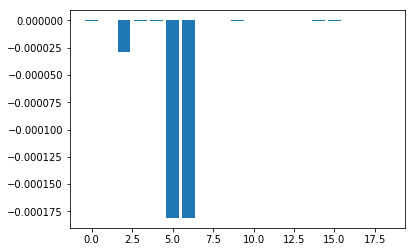

In [188]:
# get importance
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [189]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.90


In [190]:
scores = cross_val_score(estimator=clf, X=X, y=y, cv=10, n_jobs=4)
print(scores)

[0.88272583 0.89698891 0.85419968 0.88114105 0.76545166 0.89857369
 0.89223455 0.8858954  0.91587302 0.86984127]


Feature: 0, Score: 0.02892
Feature: 1, Score: 0.00451
Feature: 2, Score: 0.07379
Feature: 3, Score: 0.01763
Feature: 4, Score: 0.02524
Feature: 5, Score: 0.05568
Feature: 6, Score: 0.01025
Feature: 7, Score: 0.02420
Feature: 8, Score: 0.41624
Feature: 9, Score: 0.02015
Feature: 10, Score: 0.00657
Feature: 11, Score: 0.15322
Feature: 12, Score: 0.12267
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.01028
Feature: 15, Score: 0.02718
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00281
Feature: 18, Score: 0.00064


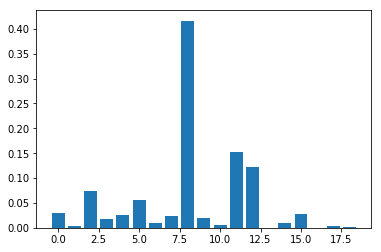

In [191]:
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Accuracy of Random Forest  Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 1.00
Feature: 0, Score: 0.02562
Feature: 1, Score: 0.01949
Feature: 2, Score: 0.09364
Feature: 3, Score: 0.03245
Feature: 4, Score: 0.02930
Feature: 5, Score: 0.04198
Feature: 6, Score: 0.02342
Feature: 7, Score: 0.15494
Feature: 8, Score: 0.23977
Feature: 9, Score: 0.02783
Feature: 10, Score: 0.00989
Feature: 11, Score: 0.10922
Feature: 12, Score: 0.12996
Feature: 13, Score: 0.00042
Feature: 14, Score: 0.02116
Feature: 15, Score: 0.02777
Feature: 16, Score: 0.00039
Feature: 17, Score: 0.00529
Feature: 18, Score: 0.00747


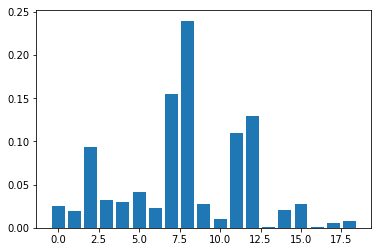

In [192]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# fit the model
model.fit(X, y)

print('Accuracy of Random Forest  Classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [193]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.85


In [194]:
scores = cross_val_score(estimator=knn, X=X, y=y, cv=10, n_jobs=4)
print(scores)


[0.86212361 0.82567353 0.70364501 0.83518225 0.7955626  0.85895404
 0.83676704 0.86212361 0.83174603 0.83650794]


In [195]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.80
Accuracy of LDA classifier on test set: 0.79


In [196]:
scores = cross_val_score(estimator=lda, X=X, y=y, cv=10, n_jobs=4)
print(scores)


[0.77654517 0.79397781 0.86687797 0.8637084  0.79239303 0.78605388
 0.73534073 0.79714739 0.75714286 0.76666667]


In [197]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.69
Accuracy of GNB classifier on test set: 0.70


In [198]:
scores = cross_val_score(estimator=gnb, X=X, y=y, cv=10, n_jobs=4)
print(scores)

[0.58320127 0.67828843 0.58478605 0.47385103 0.66085578 0.72583201
 0.46909667 0.5562599  0.48730159 0.51904762]


In [199]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.67
Accuracy of SVM classifier on test set: 0.69


In [200]:
scores = cross_val_score(estimator=svm, X=X, y=y, cv=10, n_jobs=4)
print(scores)


[0.67828843 0.659271   0.6022187  0.68621236 0.6703645  0.66402536
 0.67511886 0.67987322 0.67777778 0.68253968]


[0.92393027 0.93026941 0.85419968 0.91283677 0.78288431 0.90174326
 0.90332805 0.93660856 0.93968254 0.9031746 ]
Feature: 0, Score: 0.02792
Feature: 1, Score: 0.02706
Feature: 2, Score: 0.04159
Feature: 3, Score: 0.01703
Feature: 4, Score: 0.00610
Feature: 5, Score: 0.10410
Feature: 6, Score: 0.01079
Feature: 7, Score: 0.01605
Feature: 8, Score: 0.35796
Feature: 9, Score: 0.01581
Feature: 10, Score: 0.03438
Feature: 11, Score: 0.10542
Feature: 12, Score: 0.18159
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.01386
Feature: 15, Score: 0.01734
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00870
Feature: 18, Score: 0.01430


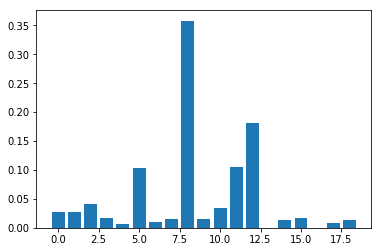

In [201]:
# xgboost for feature importance on a classification problem
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
scores = cross_val_score(estimator=model, X=X, y=y, cv=10, n_jobs=4)
print(scores)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


[0.86212361 0.82567353 0.70364501 0.83518225 0.7955626  0.85895404
 0.83676704 0.86212361 0.83174603 0.83650794]
Feature: 0, Score: 0.00105
Feature: 1, Score: 0.00010
Feature: 2, Score: 0.04226
Feature: 3, Score: 0.00098
Feature: 4, Score: 0.00127
Feature: 5, Score: 0.00067
Feature: 6, Score: 0.00044
Feature: 7, Score: 0.14705
Feature: 8, Score: 0.25786
Feature: 9, Score: 0.00063
Feature: 10, Score: 0.00006
Feature: 11, Score: 0.00932
Feature: 12, Score: 0.00044
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00184
Feature: 15, Score: 0.00181
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00003


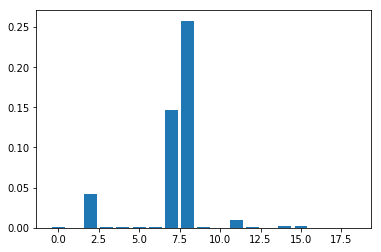

In [203]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset

# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)

scores = cross_val_score(estimator=model, X=X, y=y, cv=10, n_jobs=4)
print(scores)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()